In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(["area_type","society","balcony","availability"],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3["bhk"] =  df3["size"].apply(lambda x: int(x.split(" ")[0]))

In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(num):
    try:
        float(num)
    except:
        return False
    return True

In [12]:
df3[~df3["total_sqft"].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [13]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if (len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [14]:
df4 = df3.copy()
df4["total_sqft"] = df4.total_sqft.apply(convert_sqft_to_num)


In [15]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [16]:
df5 = df4.copy()
df5["price_per_sqft"] = (df5["price"] * 100000)/df5["total_sqft"]

In [17]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [18]:
#df5["location"].str.strip()
#df5.location.unique()


In [19]:
location_stats = df5.groupby("location")["location"].agg("count")

In [20]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [21]:
df5["location"] = df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [22]:
df6 = df5[~ (df5.total_sqft/df5.bhk <300)]
df6.shape

(12502, 7)

In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        mean = np.mean(subdf.price_per_sqft)
        sd= np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean-sd)) & (subdf.price_per_sqft <= (mean+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out
    

In [24]:
df7 = remove_pps_outliers(df6)

In [25]:
df7.shape

(10244, 7)

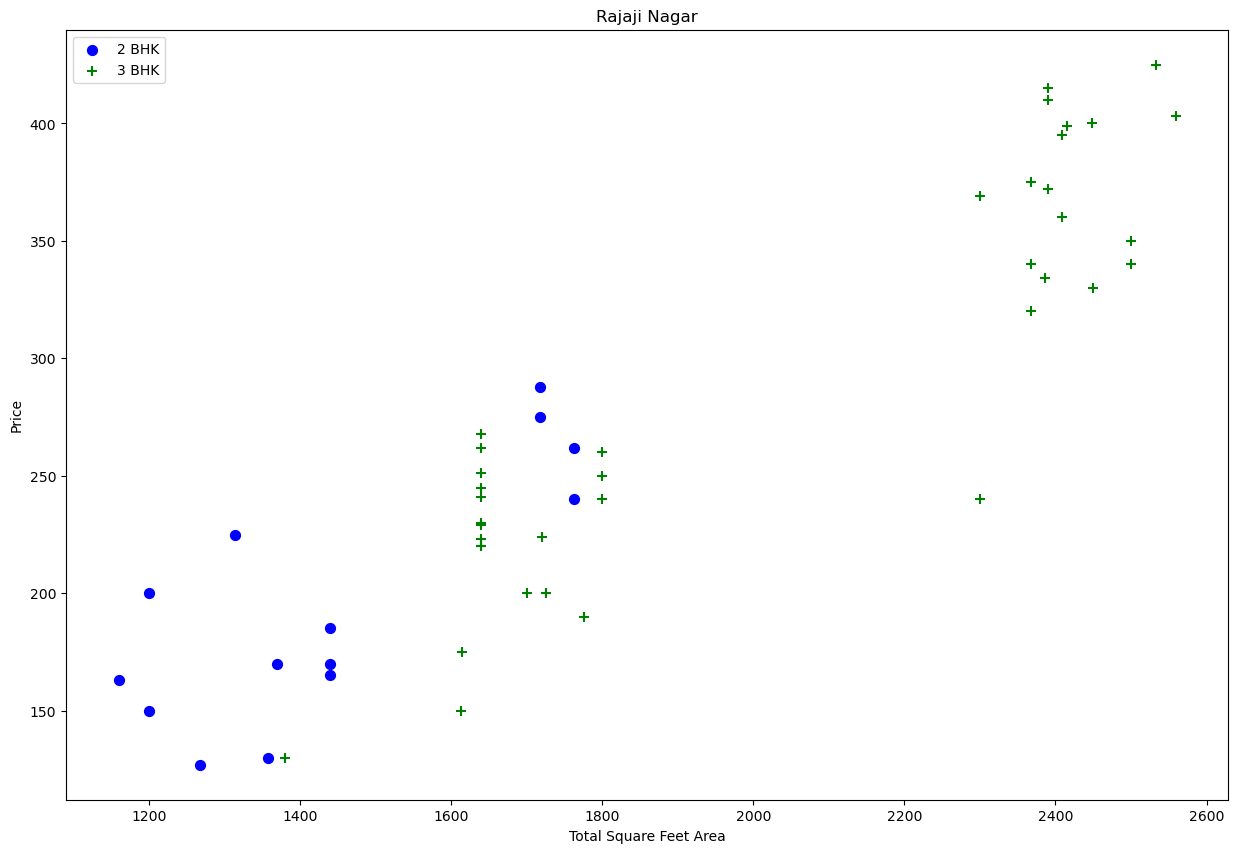

In [26]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

In [27]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


In [48]:
df8 = remove_bhk_outliers(df7)
df8.shape

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [29]:
df9= df8[df8.bath<df8.bhk+2]
df9.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [46]:
df10 = df9.drop(columns = ["size","price_per_sqft"])

,location,total_sqft,bath,price,bhk


In [31]:
dummies = pd.get_dummies(df10["location"])


In [54]:
df11 = pd.concat([df10,dummies.drop("other",axis = "columns")],axis="columns")


KeyError: 'others'

In [33]:
df12 = df11.drop("location", axis="columns")

In [34]:
X = df12.drop("price", axis = "columns")
Y = df12.price

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test, Y_test)

0.8468477166831808

In [37]:
'''from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=10)
cross_val_score(LinearRegression(), X, Y, cv=cv)'''

'from sklearn.model_selection import ShuffleSplit\nfrom sklearn.model_selection import cross_val_score\n\ncv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=10)\ncross_val_score(LinearRegression(), X, Y, cv=cv)'

In [38]:
'''from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': { 
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_

        })

    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,Y)
'''

"from sklearn.model_selection import GridSearchCV\n\nfrom sklearn.linear_model import Lasso\nfrom sklearn.tree import DecisionTreeRegressor\n\ndef find_best_model_using_gridsearchcv(X,y):\n    algos = {\n        'linear_regression' : {\n            'model': LinearRegression(),\n            'params': {\n                'normalize': [True, False]\n            }\n        },\n        'lasso': {\n            'model': Lasso(),\n            'params': { \n                'alpha': [1,2],\n                'selection': ['random', 'cyclic']\n            }\n        },\n\n        'decision_tree': {\n            'model': DecisionTreeRegressor(),\n            'params': {\n                'criterion' : ['mse','friedman_mse'],\n                'splitter': ['best','random']\n            }\n        }\n    }\n    \n    \n\n    scores = []\n    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n    for algo_name, config in algos.items():\n        gs = GridSearchCV(config['model'], config['params'

In [39]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x= np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [58]:
predict_price('Indira Nagar',1000,4,4)

194.18819871345988

In [59]:
import pickle
with open("bangalore_home_prices_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [60]:
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))